## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [31]:
# student 1: Ido 7192
# student 2: Dekel 0464
# student 3: Dvir 6513
# student 4: Adi 1243

## Part 2 - Experiments
You could add as many code cells as needed

### Imports & Settings

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pandas.plotting import scatter_matrix

# Scalars
from sklearn.preprocessing import StandardScaler

# Pipeline & regression algorithms
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

# Gridsearch
from sklearn.model_selection import GridSearchCV

# Scoring
from sklearn.metrics import r2_score

In [33]:
bold_on = '\033[1m'
bold_off = '\033[0m'

### Load Data

In [34]:
housing_train = pd.read_csv('housing_train.csv')
housing_test = pd.read_csv('housing_test.csv')

In [35]:
housing_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250


In [36]:
housing_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


### Visualization & EDA

In [37]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [38]:
housing_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


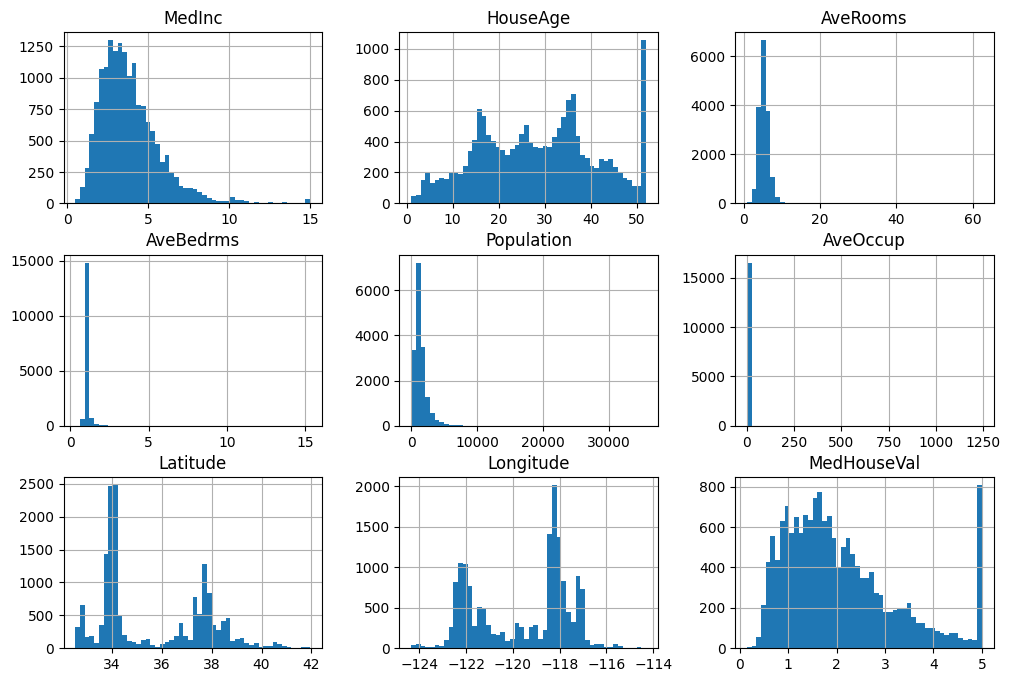

In [39]:
# Histograms to show distribution of features
housing_train.hist(bins = 50, figsize = (12, 8))
plt.show()

In [40]:
# Feature correlation with MedHouseVal
corr = housing_train.corr()
corr['MedHouseVal'].sort_values()

Latitude      -0.148847
AveBedrms     -0.065581
Longitude     -0.041367
Population    -0.025100
AveOccup      -0.022339
HouseAge       0.108339
AveRooms       0.168320
MedInc         0.686058
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

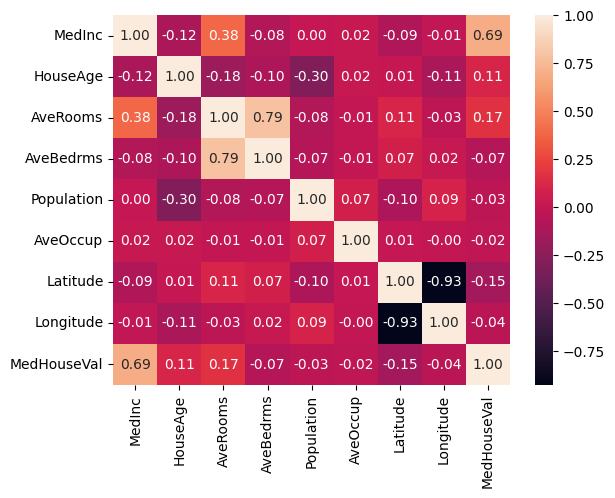

In [41]:
# Correlations between all features in dataset, in the form of a heatmap
corr_matrix = housing_train.corr()
sns.heatmap(corr_matrix, annot = True, fmt = '.2f')
plt.show()

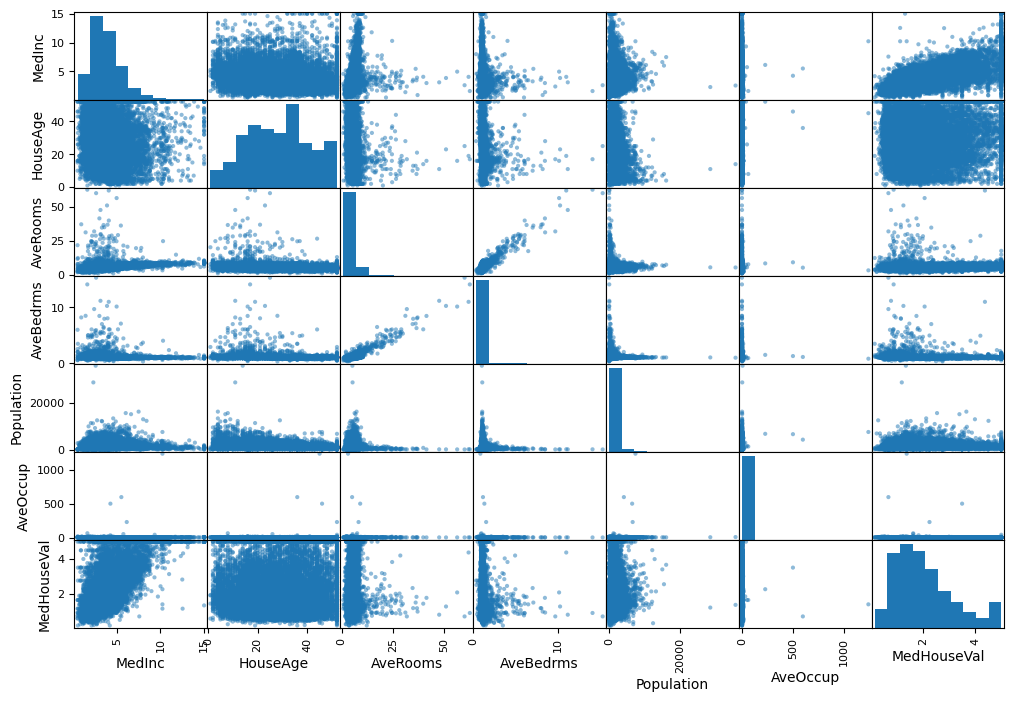

In [42]:
# Correlations between all features in dataset, in the form of a scatter matrix
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']
scatter_matrix(housing_train[attributes], figsize = (12, 8))
plt.show()

C:\Users\idob5\AppData\Local\Temp\ipykernel_696\454001511.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(["$%dk" % (v * 100) for v in tick_values], fontsize = 14)


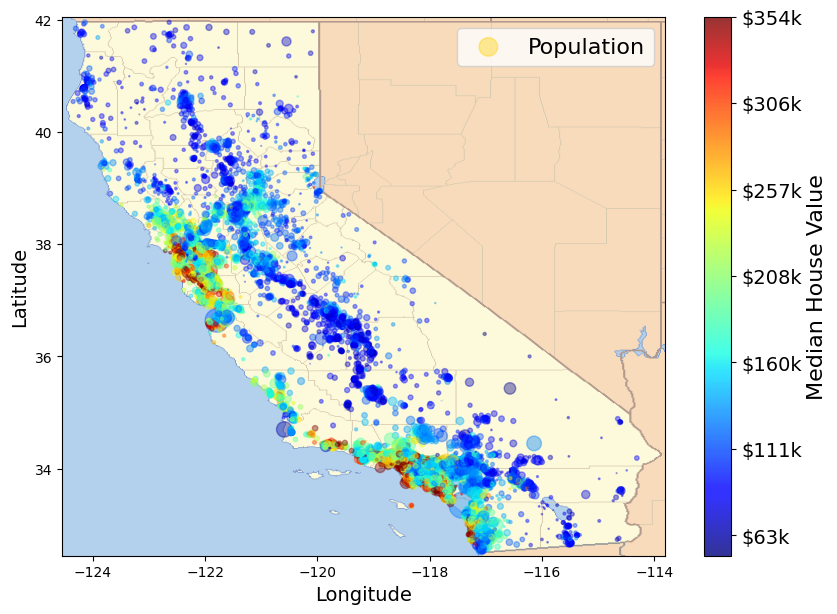

In [43]:
# Visualizing the location of the houses on the map of california
california_img = mpimg.imread('california_map.png')
ax = housing_train.plot(
	kind = "scatter", x = "Longitude", y = "Latitude", figsize = (10, 7),
	s = housing_train['Population'] / 100, label = "Population",
	c = "MedHouseVal", cmap = plt.get_cmap("jet"),
	colorbar = False, alpha = 0.4
	)

plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.8)
plt.ylabel("Latitude", fontsize = 14)
plt.xlabel("Longitude", fontsize = 14)

# Setting the colorbar
prices = housing_train["MedHouseVal"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk" % (v * 100) for v in tick_values], fontsize = 14)
cbar.set_label('Median House Value', fontsize = 16)
cbar.solids.set_cmap('jet')

plt.legend(fontsize = 16)
plt.show()

### Feature Engineering

In [44]:
# We determine which features will be dropped by the correlation heatmap shown above (highly correlated features will be dropped)
housing_train_cpy = housing_train.drop(['AveBedrms'], axis = 1)
housing_test_cpy = housing_test.drop(['AveBedrms'], axis = 1)
housing_train_cpy

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,2109.0,2.962079,32.58,-117.11,1.250
...,...,...,...,...,...,...,...,...
16507,6.0000,25.0,7.760599,1098.0,2.738155,33.78,-118.05,3.535
16508,11.0138,16.0,7.306991,868.0,2.638298,33.64,-117.81,4.421
16509,5.4675,32.0,6.169935,1790.0,2.924837,37.26,-121.91,2.611
16510,1.6932,37.0,4.661972,841.0,2.369014,38.54,-121.49,0.784


### Train-Test-Split

In [45]:
# Splitting to X and y (train and test are given)
X_train = housing_train_cpy.iloc[:, :-1]
y_train = housing_train_cpy.iloc[:, -1]
X_test = housing_test_cpy.iloc[:, :-1]
y_test = housing_test_cpy.iloc[:, -1]

 ### Linear Regression

In [46]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_pred = linear_regression.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)
print('--------------------')
print('Y-Intercept:', linear_regression.intercept_)
print('\nCoefficients: ')

for i, name in enumerate(X_train.columns):
	print(f"{name}: {linear_regression.coef_[i]}")

R^2 Score: 0.6052671991618188
--------------------
Y-Intercept: -38.78067891054996

Coefficients: 
MedInc: 0.37350671279778414
HouseAge: 0.009714951388067676
AveRooms: 0.013146564045478332
Population: -2.1272676440088395e-06
AveOccup: -0.0032209133202684794
Latitude: -0.45566657638113534
Longitude: -0.4625257276214091


### Decision Tree

In [47]:
decision_tree_regression = DecisionTreeRegressor()
decision_tree_regression.fit(X_train, y_train)

y_pred = decision_tree_regression.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

R^2 Score: 0.6354503507163267


### Lasso

In [48]:
lasso_regression = Lasso(alpha = 0.1)
lasso_regression.fit(X_train, y_train)

y_pred = lasso_regression.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

R^2 Score: 0.5539343652287188


### Grid Search Cross-Validation

In [49]:
# List of models and hyper-parameters tested using Grid Search
models = [{
	          'model': LinearRegression(),
	          'param': {'n_jobs': [None]}
          },

          {
	          'model': Lasso(),
	          'param': {'alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]}
          },

          {
	          'model': DecisionTreeRegressor(),
	          'param': {
		          'min_samples_split': [50, 75, 90, 93, 95, 97, 100, 105, 110],
		          'max_depth':         [10, 13, 14, 15, 16, 17, 20, 25]
	          }
          }]

res_list = []
best_score = 0

# Grid Search using 5-fold cross-validation
for model in models:
	cross_val = GridSearchCV(model['model'], model['param'], cv = 5, scoring = 'r2')
	cross_val.fit(X_train, y_train)

	if cross_val.best_score_ > best_score:
		best_score = cross_val.best_score_
		best_model = cross_val.best_estimator_

	current_model_df = pd.DataFrame(cross_val.cv_results_)
	model_name = model['model'].__class__.__name__
	current_model_df['model_name'] = model_name
	res_list.append(current_model_df)

scores_df = pd.concat(res_list, ignore_index = True)

In [50]:
# Display the results of the Grid Search sorted by the best R^2 score
scores_df = scores_df[['model_name', 'params', 'mean_test_score']]
scores_df.sort_values(by = ['mean_test_score'], ascending = False, inplace = True)
scores_df.reset_index(drop = True, inplace = True)
scores_df

,model_name,params,mean_test_score
0,DecisionTreeRegressor,"{'max_depth': 14, 'min_samples_split': 93}",0.702432
1,DecisionTreeRegressor,"{'max_depth': 17, 'min_samples_split': 75}",0.702052
2,DecisionTreeRegressor,"{'max_depth': 15, 'min_samples_split': 75}",0.701984
3,DecisionTreeRegressor,"{'max_depth': 25, 'min_samples_split': 95}",0.701907
4,DecisionTreeRegressor,"{'max_depth': 16, 'min_samples_split': 75}",0.701835
...,...,...,...
76,Lasso,{'alpha': 1e-08},0.593503
77,LinearRegression,{'n_jobs': None},0.593503
78,Lasso,{'alpha': 0.001},0.593501
79,Lasso,{'alpha': 0.01},0.592927


In [51]:
# Best regression model and hyper-parameters
print(
	f"{bold_on}{scores_df['model_name'][0]}{bold_off} with parameters {bold_on}{scores_df['params'][0]}{bold_off} is the best regression combination"
	)

DecisionTreeRegressor with parameters {'max_depth': 14, 'min_samples_split': 93} is the best regression combination


In [52]:
# Best R^2 score
print(f"Best R^2 score: {bold_on}{scores_df['mean_test_score'][0]}{bold_off}")

Best R^2 score: 0.7024315452243668


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [53]:
# R^2 score of entire train dataset
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print('R^2 Score:', r2)

R^2 Score: 0.7964333879835297


## Part 4 - Apply on test and show model performance estimation

In [54]:
# R^2 score of test dataset
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

R^2 Score: 0.7338333049590844


In [55]:
# Predictions
pred_df = pd.DataFrame(y_pred)
pred_df.columns = ['MedHouseVal_prediction']
pred_df.head()

,MedHouseVal_prediction
0,3.579163
1,2.220149
2,3.247929
3,1.100720
4,1.147567
